In [2]:
#import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [3]:
DataMent = pd.read_csv('/content/sample_data/Mental Health Dataset.csv')

In [22]:
DataMent.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [8]:
print(DataMent.columns)

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')


In [9]:
print(DataMent.shape)

(292364, 17)


In [10]:
print(DataMent.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
def check_for_missing_and_null(df):
    null_df = pd.DataFrame({'columns': df.columns,
                            'percent_null': df.isnull().sum() * 100 / len(df),
                            'percent_zero': df.isin([0]).sum() * 100 / len(df),
                            'percent_?': (df == '?').sum() * 100 / len(df),
                            'percent_duplicated':df.duplicated().sum()* 100 / len(df)})
    return null_df.sort_values(by='percent_null', ascending=False)

In [5]:
null_DataMent=check_for_missing_and_null(DataMent)
null_DataMent

,columns,percent_null,percent_zero,percent_?,percent_duplicated
self_employed,self_employed,1.779289,0.0,0.0,0.791137
Timestamp,Timestamp,0.000000,0.0,0.0,0.791137
Changes_Habits,Changes_Habits,0.000000,0.0,0.0,0.791137
mental_health_interview,mental_health_interview,0.000000,0.0,0.0,0.791137
Social_Weakness,Social_Weakness,0.000000,0.0,0.0,0.791137
Work_Interest,Work_Interest,0.000000,0.0,0.0,0.791137
Coping_Struggles,Coping_Struggles,0.000000,0.0,0.0,0.791137
Mood_Swings,Mood_Swings,0.000000,0.0,0.0,0.791137
Mental_Health_History,Mental_Health_History,0.000000,0.0,0.0,0.791137
Growing_Stress,Growing_Stress,0.000000,0.0,0.0,0.791137


In [6]:
DataMent = DataMent.dropna()

In [7]:
# Supprimer les doublons
DataMent = DataMent.drop_duplicates()


In [8]:
null_DataMent=check_for_missing_and_null(DataMent)
null_DataMent

,columns,percent_null,percent_zero,percent_?,percent_duplicated
Timestamp,Timestamp,0.0,0.0,0.0,0.0
Changes_Habits,Changes_Habits,0.0,0.0,0.0,0.0
mental_health_interview,mental_health_interview,0.0,0.0,0.0,0.0
Social_Weakness,Social_Weakness,0.0,0.0,0.0,0.0
Work_Interest,Work_Interest,0.0,0.0,0.0,0.0
Coping_Struggles,Coping_Struggles,0.0,0.0,0.0,0.0
Mood_Swings,Mood_Swings,0.0,0.0,0.0,0.0
Mental_Health_History,Mental_Health_History,0.0,0.0,0.0,0.0
Growing_Stress,Growing_Stress,0.0,0.0,0.0,0.0
Gender,Gender,0.0,0.0,0.0,0.0


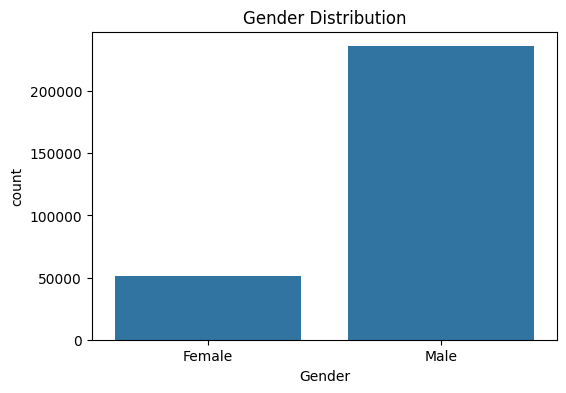

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=DataMent, x='Gender')
plt.title('Gender Distribution')
plt.show()

In [33]:
!pip uninstall -y tensorflow tensorflow-data-validation pandas protobuf pyarrow tfx-bsl tensorflow-serving-api tensorflow-text
!pip install tensorflow==2.16.0
!pip install tensorflow-data-validation==1.16.1
!pip install pandas==1.5.3
!pip install protobuf==3.20.3
!pip install pyarrow==15.0.2


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: tensorflow-data-validation 1.16.1
Uninstalling tensorflow-data-validation-1.16.1:
  Successfully uninstalled tensorflow-data-validation-1.16.1
Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
Found existing installation: pyarrow 10.0.1
Uninstalling pyarrow-10.0.1:
  Successfully uninstalled pyarrow-10.0.1
Found existing installation: tfx-bsl 1.16.1
Uninstalling tfx-bsl-1.16.1:
  Successfully uninstalled tfx-bsl-1.16.1
Found existing installation: tensorflow-serving-api 2.16.1
Uninstalling tensorflow-serving-api-2.16.1:
  Successfully uninstalled tensorflow-serving-api-2.16.1
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.7 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 447, in run
    conflicts = self._determine_conflicts(to_install)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 578, in _determine_conflicts
    return check_install_conflicts(to_install)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/operations/check.py", line 101, in check_install_c

In [1]:
import tensorflow_data_validation as tfdv
######NOTE: The visualization will only display in Chrome browser. ########
full_data_stats = tfdv.generate_statistics_from_csv(data_location='/content/sample_data/Mental Health Dataset.csv')
tfdv.visualize_statistics(full_data_stats)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


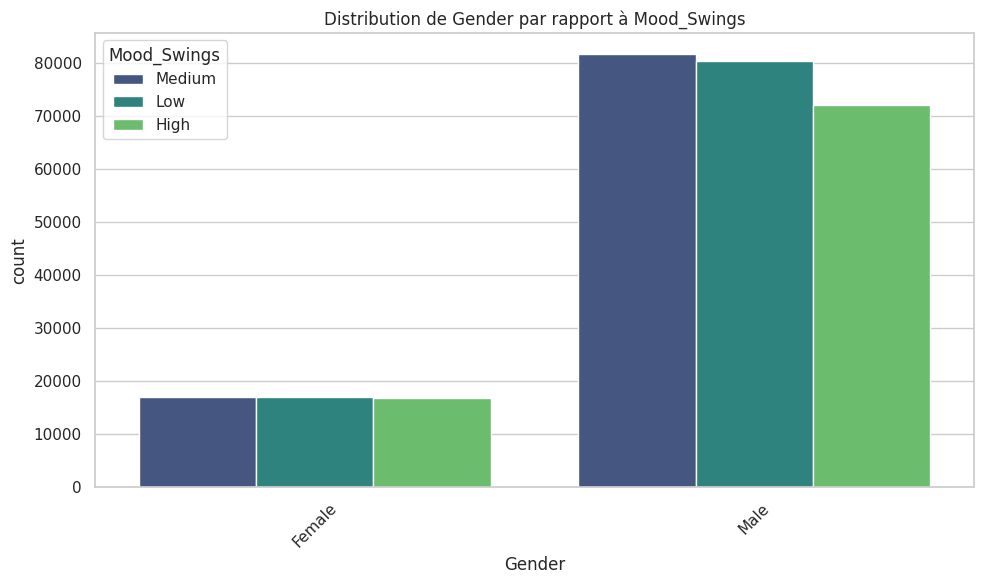

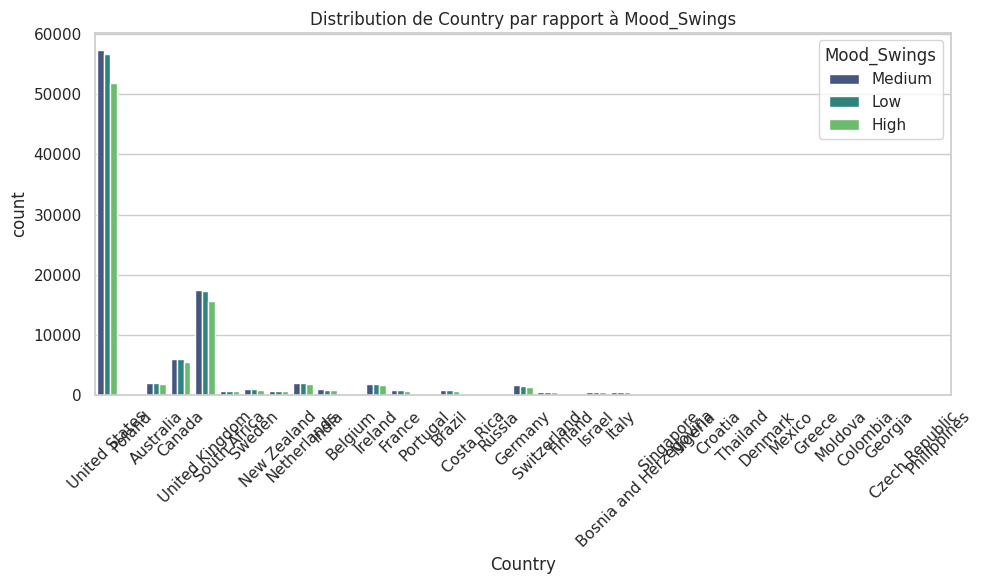

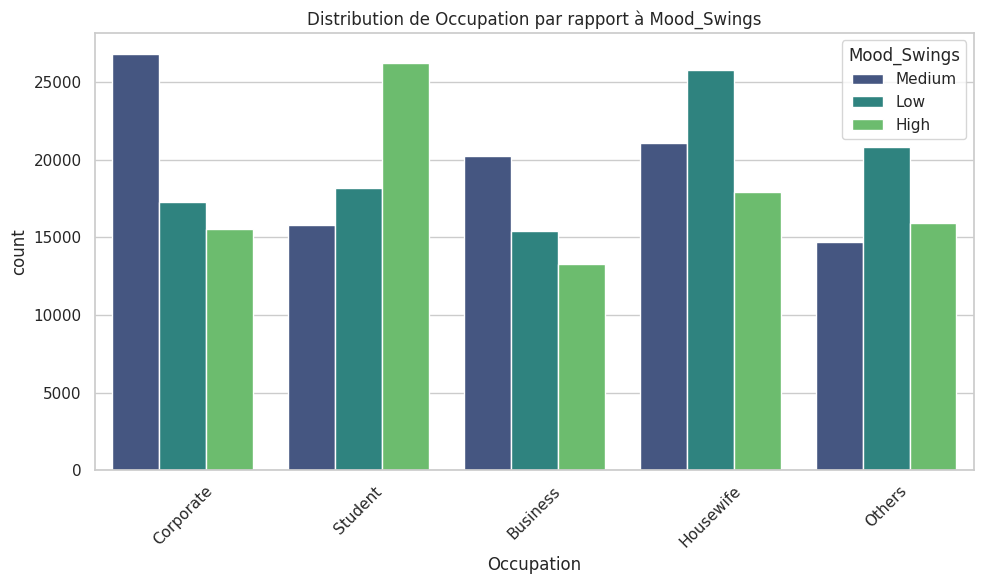

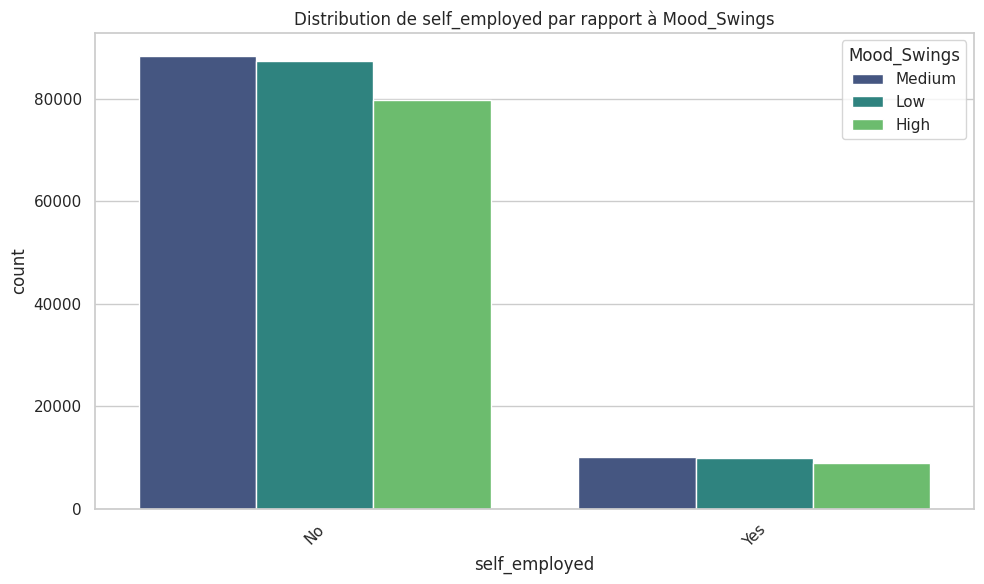

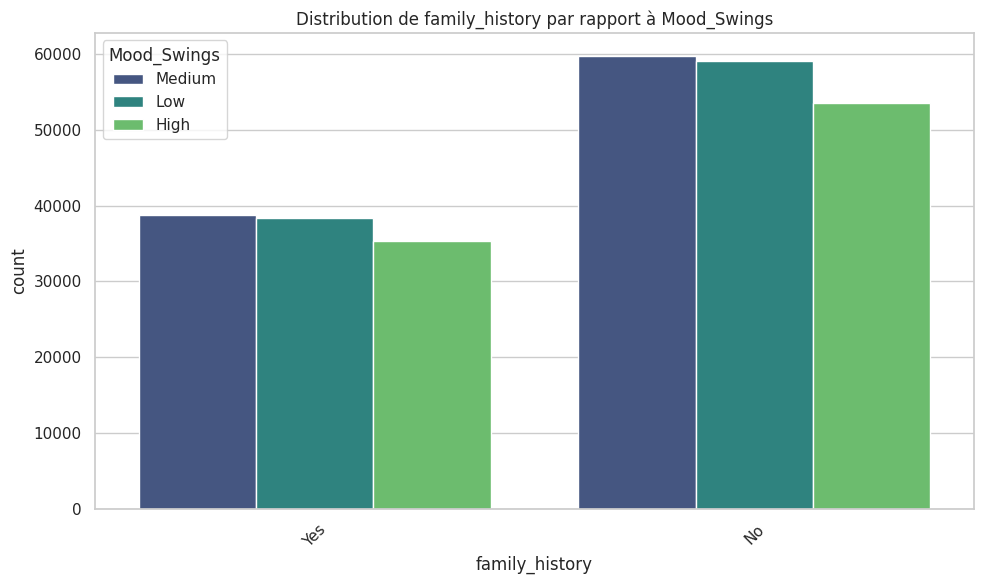

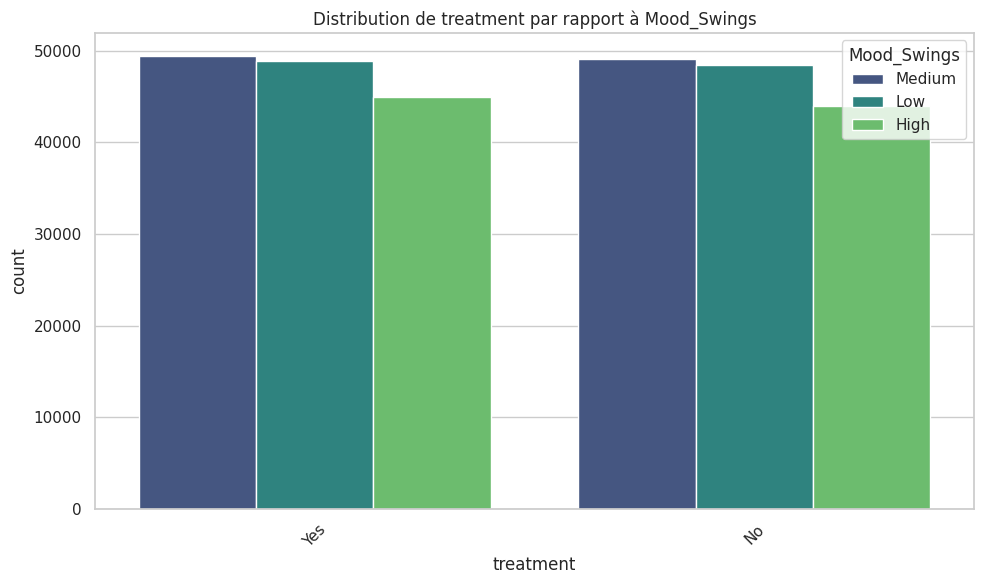

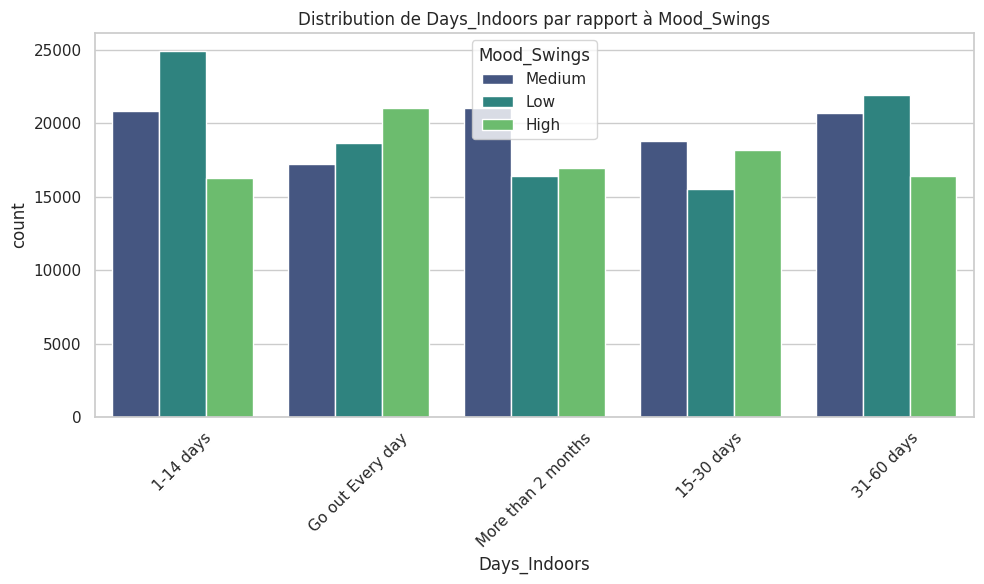

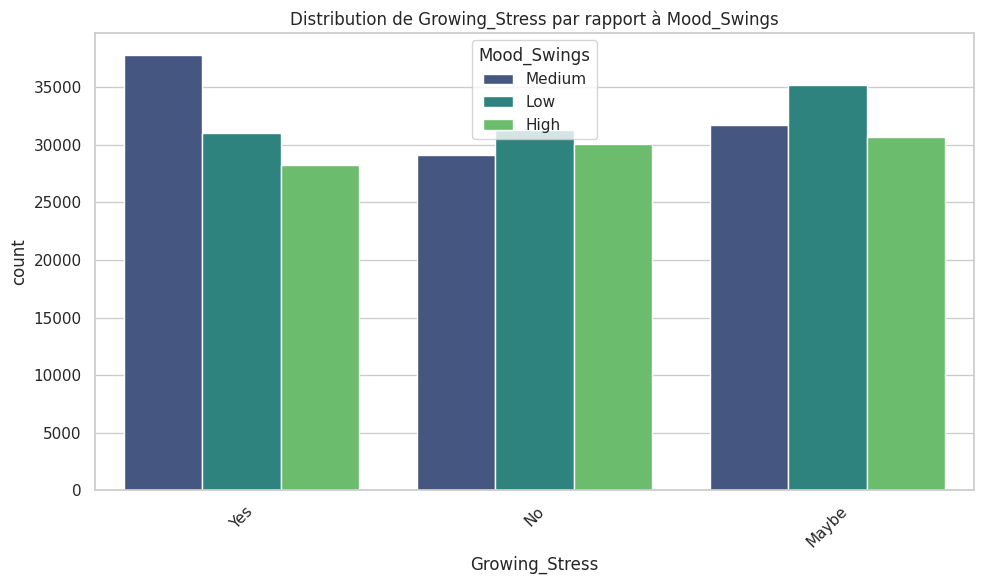

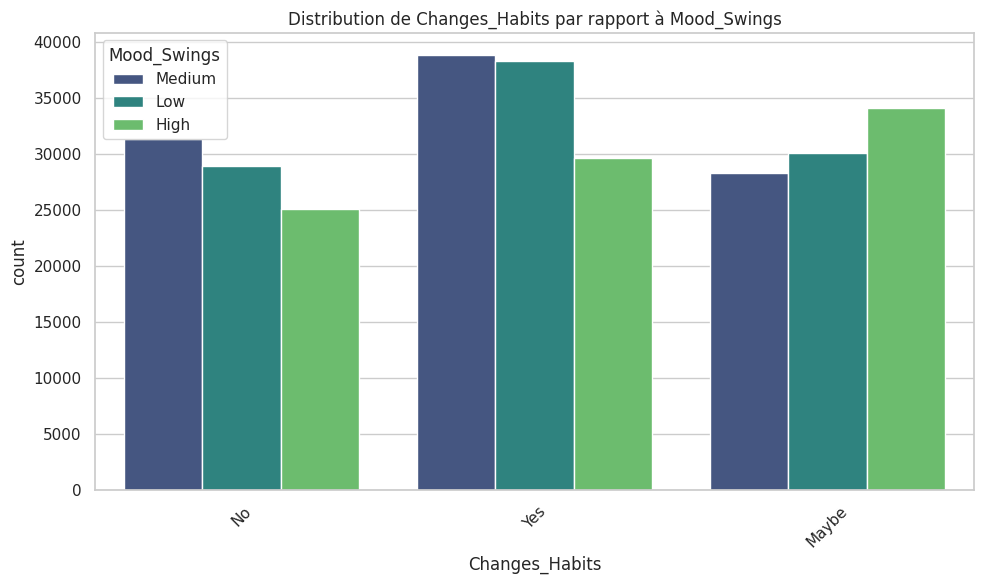

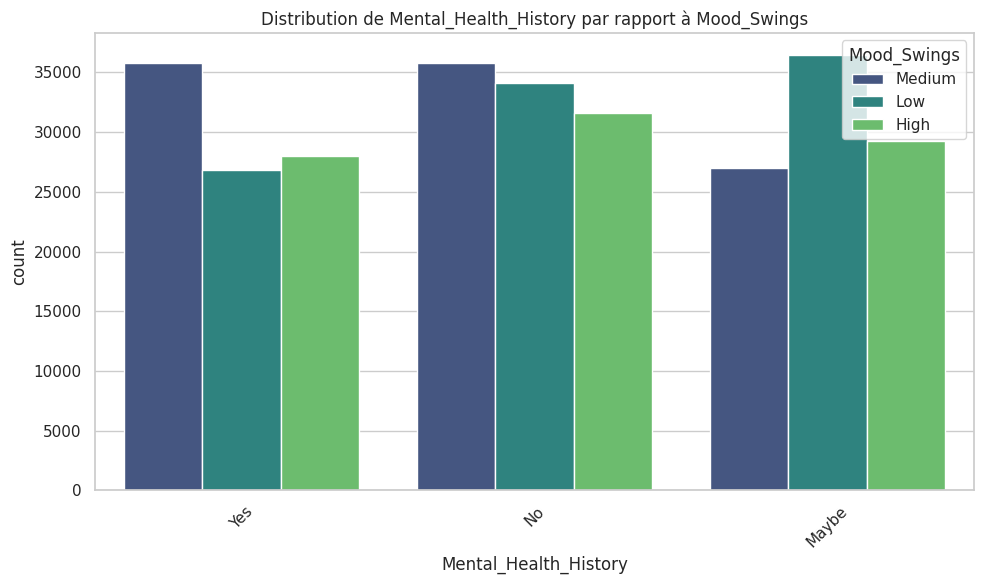

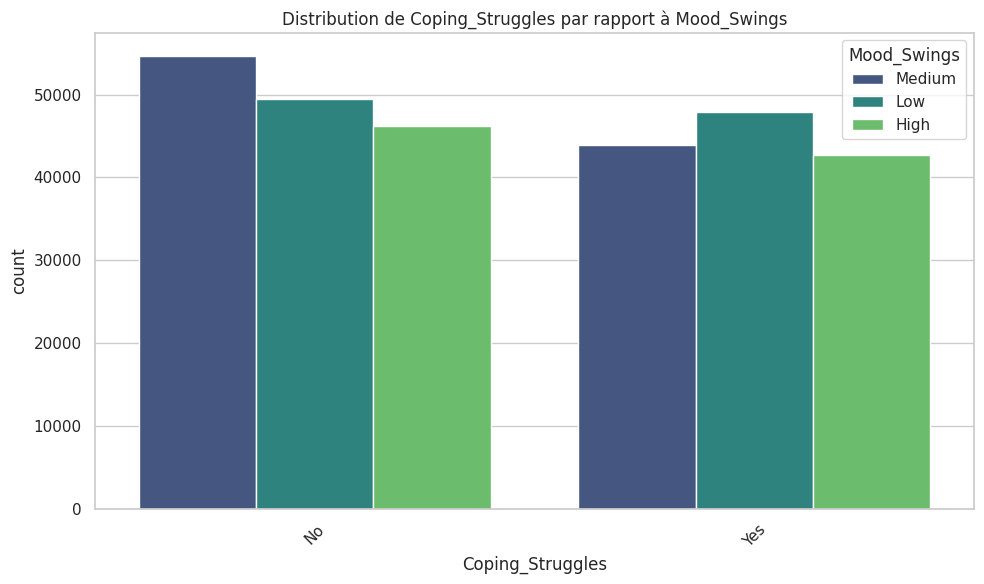

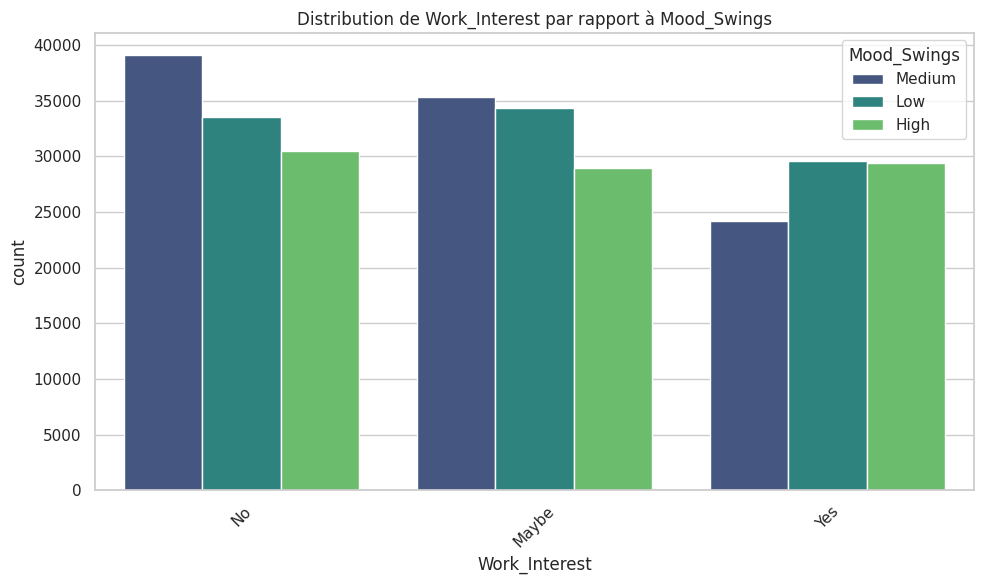

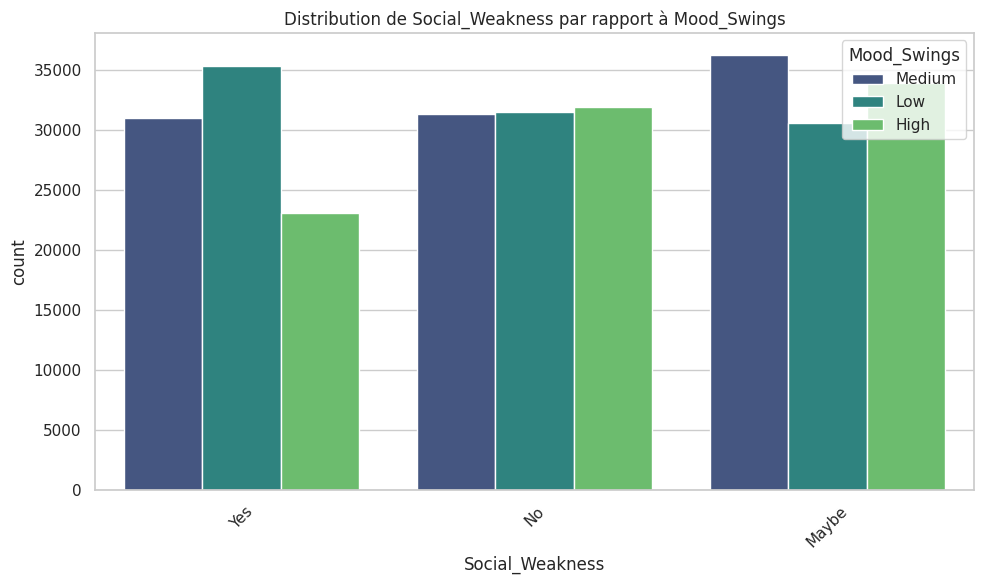

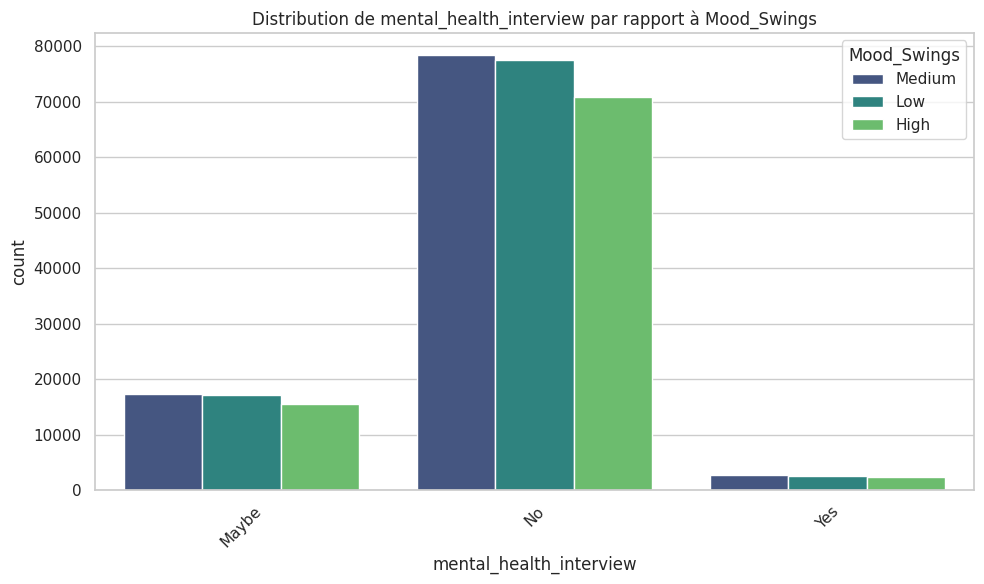

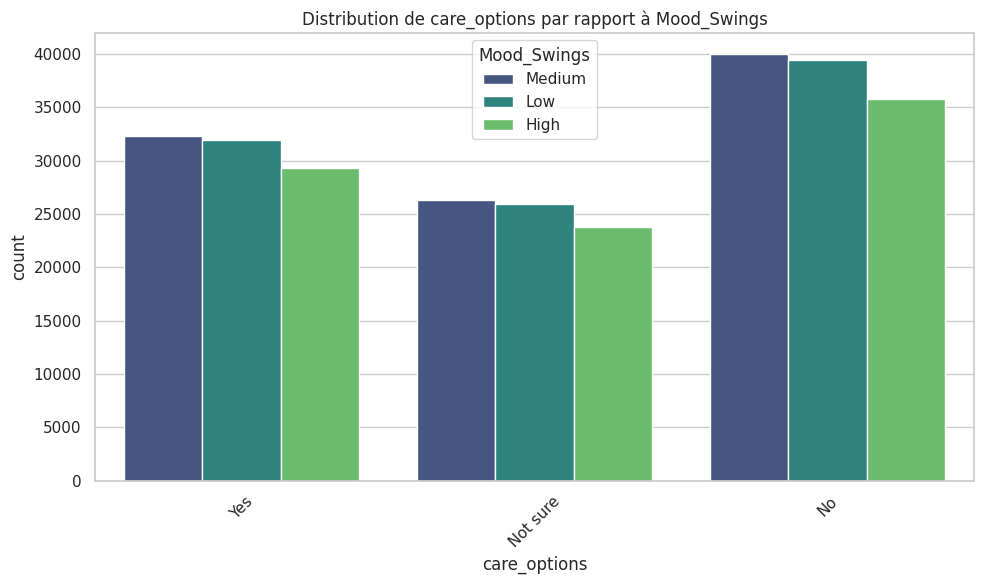

In [28]:
# Liste des colonnes à visualiser par rapport à 'Mood_Swings'
columns_to_visualize = [
    'Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
    'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
    'Mental_Health_History', 'Coping_Struggles', 'Work_Interest',
    'Social_Weakness', 'mental_health_interview', 'care_options'
]

# Configurer le style des graphiques
sns.set(style="whitegrid")

# Boucle pour créer les visualisations
for col in columns_to_visualize:
    plt.figure(figsize=(10, 6))

    # Si la colonne est catégorielle
    if DataMent[col].dtype == 'object':
        # Diagramme en barres
        sns.countplot(data=DataMent, x=col, hue='Mood_Swings', palette='viridis')
        plt.title(f'Distribution de {col} par rapport à Mood_Swings')
        plt.xticks(rotation=45)
        plt.legend(title='Mood_Swings')

    # Si la colonne est numérique
    else:
        # Boxplot
        sns.boxplot(data=DataMent, x='Mood_Swings', y=col, palette='coolwarm')
        plt.title(f'Distribution de {col} par rapport à Mood_Swings')

    plt.tight_layout()
    plt.show()

                        Timestamp    Gender   Country Occupation  \
Timestamp                     1.0  0.904631  0.906882   0.022367   
Gender                   0.904631  0.999988  0.178975   0.049451   
Country                  0.906882  0.178975       1.0   0.004425   
Occupation               0.022367  0.049451  0.004425        1.0   
self_employed            0.896802  0.066129   0.33993   0.003271   
family_history           0.892569  0.197174  0.237443   0.009751   
treatment                0.886538  0.170879  0.263386   0.008451   
Days_Indoors             0.013923  0.030782  0.002755   0.069051   
Growing_Stress           0.036441  0.056968   0.00721   0.078339   
Changes_Habits            0.00743  0.011616   0.00147   0.065582   
Mental_Health_History    0.023325  0.036463  0.004615   0.074175   
Mood_Swings              0.012824  0.020048  0.002537   0.134899   
Coping_Struggles         0.051816  0.057269  0.010251    0.07979   
Work_Interest            0.014078  0.022008  0.0

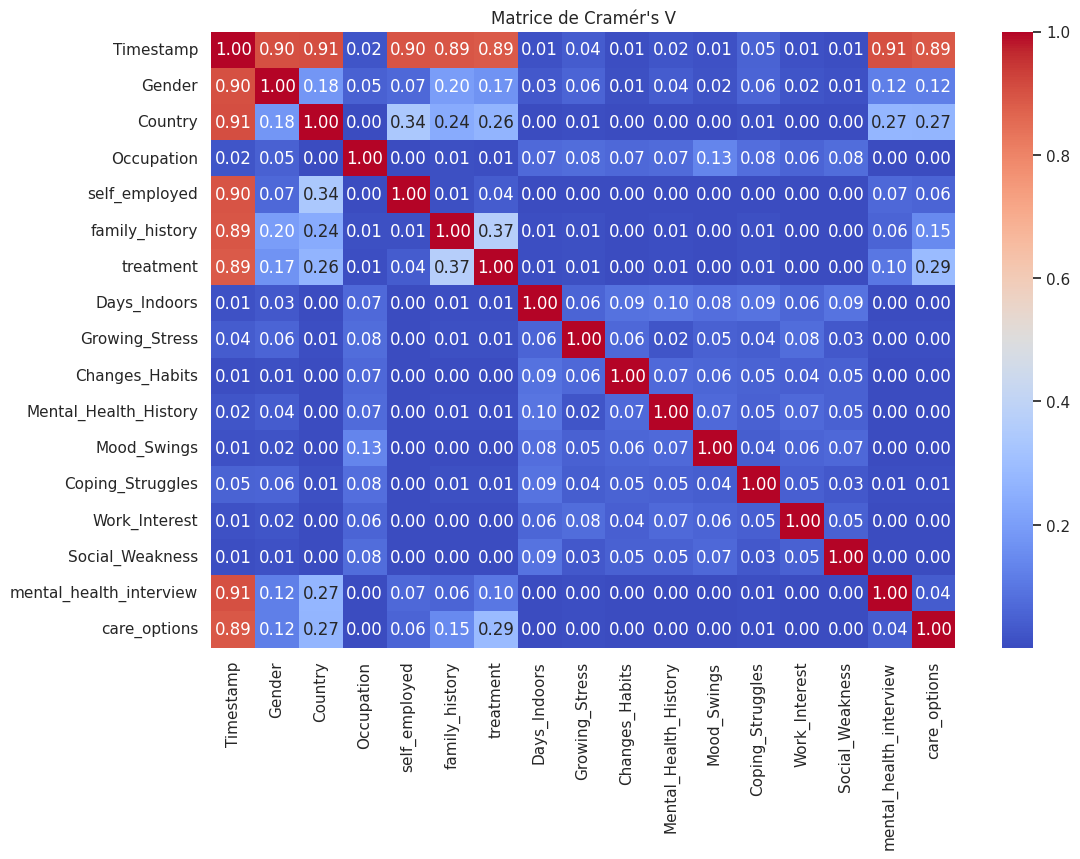

In [29]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calcule le coefficient de Cramér's V entre deux variables catégorielles."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min((k-1), (r-1)))

# Exemple d'utilisation
cramers_results = pd.DataFrame(index=DataMent.columns, columns=DataMent.columns)

for col1 in DataMent.columns:
    for col2 in DataMent.columns:
        cramers_results.loc[col1, col2] = cramers_v(DataMent[col1], DataMent[col2])

# Afficher la matrice de Cramér's V
print(cramers_results)



plt.figure(figsize=(12, 8))
sns.heatmap(cramers_results.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de Cramér's V")
plt.show()

Analysis of Associations Between Categorical Variables Using the Cramér’s V Matrix
The matrix above shows the Cramér’s V coefficients calculated between all categorical variables in our dataset.

What is Cramér’s V?
Cramér’s V is a statistical measure derived from the chi-squared test that quantifies the strength of association between two categorical variables.

Its value ranges from 0 (no association) to 1 (perfect association).

It allows us to assess how strongly two categorical variables are related, regardless of sample size or number of categories.

For example, a value close to 0.1 indicates a weak association, while a value above 0.5 suggests a strong association.

Observed Results
The Timestamp variable, which corresponds to the consultation time (encounter level), shows a strong association with several variables such as Country, mental_health_interview, and care_options (values above 0.9).
This strong correlation is expected because these variables are recorded or influenced at the time of the consultation.

In contrast, most other variables exhibit weak or very weak associations with each other, indicating a diverse set of information in the dataset.

The target variable Mood_Swings does not show strong correlations with other variables, suggesting that its prediction will require models capable of capturing complex relationships.

Important Limitation Due to the Absence of Patient Identifier
We have 574 unique values in Timestamp, corresponding to consultations, but no patient identifier.

This means multiple consultations may belong to the same patient, but we have no way to group them.

This limitation forces us to work at the consultation level, which may introduce dependence between observations and restrict longitudinal modeling.

Creating a reliable patient ID is not possible with the current data and must be considered when interpreting the results.

Conclusion
The Cramér’s V matrix reveals groups of strongly associated variables, notably around the Timestamp variable linked to consultations. This strong association reflects the data structure at the encounter level and should be considered to avoid redundancy during modeling.

Moreover, the absence of patient identifiers constrains us to model at the consultation level, with the associated limitations regarding observation independence and longitudinal analysis.

Finally, the overall weak association between the target variable and other features highlights the need for complex models capable of detecting subtle patterns.

In [9]:
label_encoders = {}
for col in DataMent.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    DataMent[col] = le.fit_transform(DataMent[col])
    label_encoders[col] = le

In [33]:
print("Colonnes encodées :", DataMent.select_dtypes(exclude=['number']).columns)
print("Shape final :", DataMent.shape)


Colonnes encodées : Index([], dtype='object')
Shape final : (284858, 17)


In [10]:
# Séparer les features (X) et la target (y)
X = DataMent.drop('Mood_Swings', axis=1)  # Remplacez 'target' par le nom de votre colonne cible
y = DataMent['Mood_Swings']

In [41]:
DataMent['Mood_Swings'].value_counts()

,count
Mood_Swings,
2,98592
1,97392
0,88874


Distribution of the Target Variable Mood_Swings
The distribution of cases in our dataset is as follows:

Class	Number of Samples
2	98,592
1	97,392
0	88,874
This distribution shows that the three classes are relatively balanced, with a slight imbalance favoring class 2, followed by class 1, and then class 0.

Implications for the Model
A relatively balanced class distribution is generally beneficial for training classification models, as it reduces bias caused by overrepresentation of any single class.

However, even a slight imbalance can affect performance, especially for the minority class (here class 0).

It is therefore important to monitor performance metrics per class to ensure the model does not systematically favor the majority classes.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle
gb_model = GradientBoostingClassifier(random_state=42)

# Entraîner le modèle
gb_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_gb = gb_model.predict(X_test)

# Évaluer le modèle
print("GradientBoostingClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("Classification Report :\n", classification_report(y_test, y_pred_gb))

GradientBoostingClassifier :
Accuracy : 0.6664501860563083
Classification Report :
               precision    recall  f1-score   support

           0       0.67      0.58      0.62     17608
           1       0.66      0.68      0.67     19613
           2       0.67      0.73      0.70     19751

    accuracy                           0.67     56972
   macro avg       0.67      0.66      0.66     56972
weighted avg       0.67      0.67      0.66     56972



In [39]:
from sklearn.metrics import confusion_matrix

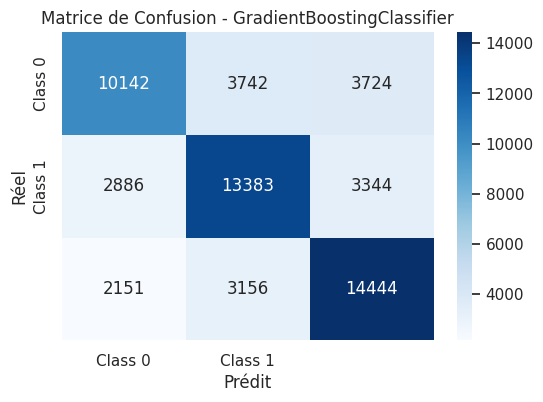

In [40]:
# Matrice de confusion pour GradientBoostingClassifier
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - GradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [41]:
from sklearn.ensemble import AdaBoostClassifier

# Initialiser le modèle
ada_model = AdaBoostClassifier(random_state=42)

# Entraîner le modèle
ada_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_ada = ada_model.predict(X_test)

# Évaluer le modèle
print("AdaBoostClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_ada))
print("Classification Report :\n", classification_report(y_test, y_pred_ada))

AdaBoostClassifier :
Accuracy : 0.4446745769851857
Classification Report :
               precision    recall  f1-score   support

           0       0.45      0.35      0.39     17608
           1       0.44      0.41      0.42     19613
           2       0.45      0.57      0.50     19751

    accuracy                           0.44     56972
   macro avg       0.44      0.44      0.44     56972
weighted avg       0.44      0.44      0.44     56972



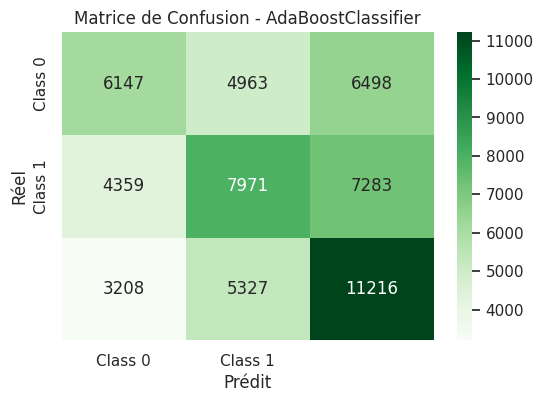

In [42]:
# Matrice de confusion pour AdaBoostClassifier
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - AdaBoostClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [17]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialiser le modèle
hist_model = HistGradientBoostingClassifier(random_state=42)

# Entraîner le modèle
hist_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_hist = hist_model.predict(X_test)

# Évaluer le modèle
print("HistGradientBoostingClassifier :")
print("Accuracy :", accuracy_score(y_test, y_pred_hist))
print("Classification Report :\n", classification_report(y_test, y_pred_hist))

HistGradientBoostingClassifier :
Accuracy : 0.9794811486344169
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     17608
           1       0.98      1.00      0.99     19613
           2       0.98      0.97      0.97     19751

    accuracy                           0.98     56972
   macro avg       0.98      0.98      0.98     56972
weighted avg       0.98      0.98      0.98     56972



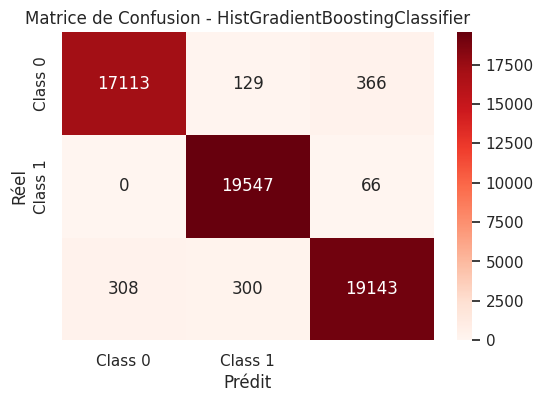

In [44]:
# Matrice de confusion pour HistGradientBoostingClassifier
cm_hist = confusion_matrix(y_test, y_pred_hist)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_hist, annot=True, fmt='d', cmap='Reds', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - HistGradientBoostingClassifier')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [45]:
from xgboost import XGBClassifier

# Initialiser le modèle
xgb_model = XGBClassifier(random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Faire des prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluer le modèle
print("XGBoost :")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Classification Report :\n", classification_report(y_test, y_pred_xgb))

XGBoost :
Accuracy : 0.9756547075756512
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     17608
           1       0.99      0.98      0.99     19613
           2       0.97      0.97      0.97     19751

    accuracy                           0.98     56972
   macro avg       0.98      0.98      0.98     56972
weighted avg       0.98      0.98      0.98     56972



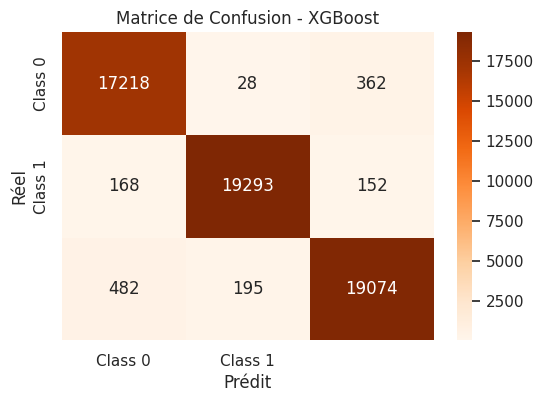

In [46]:
# Matrice de confusion pour XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Matrice de Confusion - XGBoost')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

In [47]:
# Récapitulatif des performances
results = {
    'Model': ['GradientBoosting', 'AdaBoost', 'HistGradientBoosting', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_hist),
        accuracy_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

                  Model  Accuracy
0      GradientBoosting  0.666450
1              AdaBoost  0.444675
2  HistGradientBoosting  0.979481
3               XGBoost  0.975655


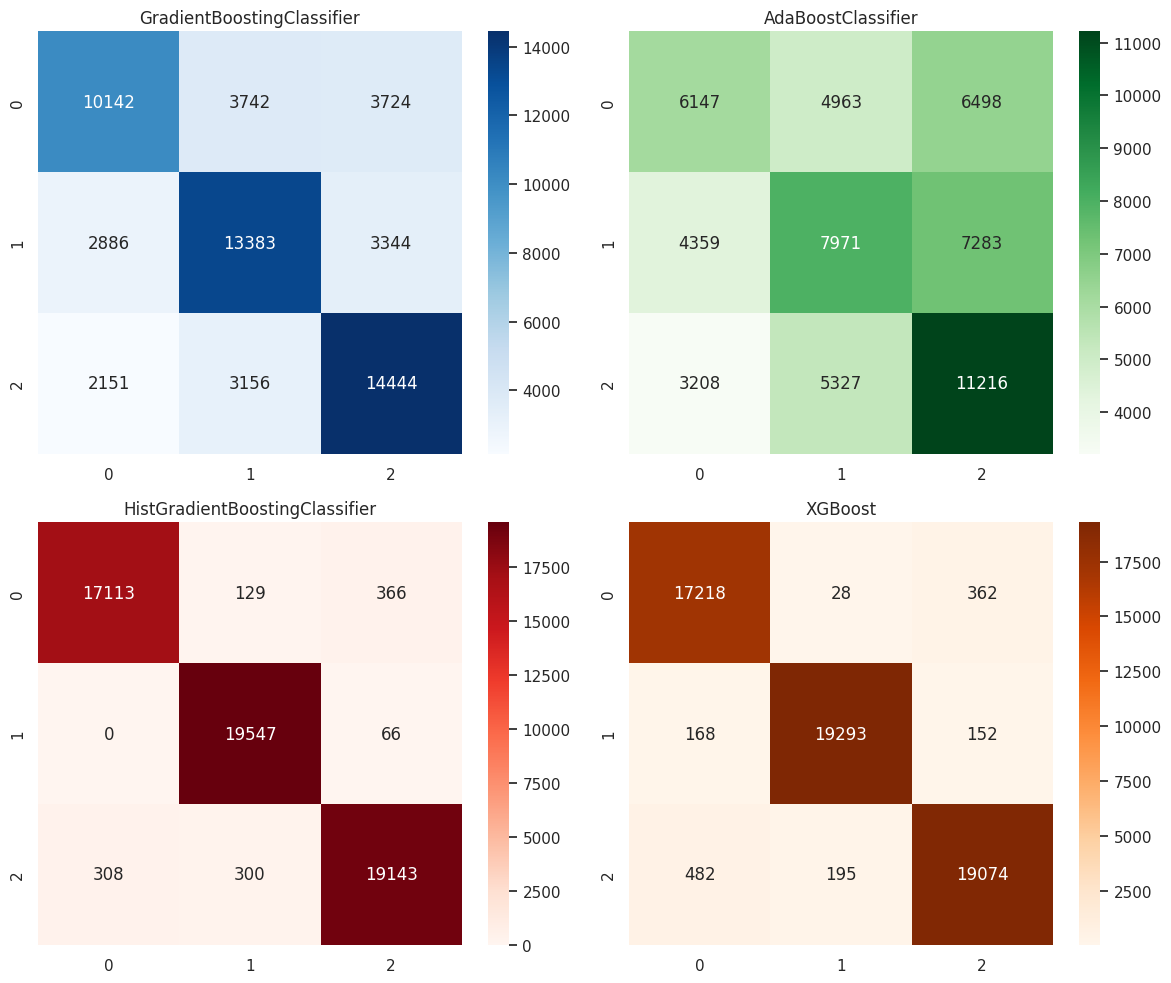

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GradientBoostingClassifier
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('GradientBoostingClassifier')

# AdaBoostClassifier
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('AdaBoostClassifier')

# HistGradientBoostingClassifier
sns.heatmap(cm_hist, annot=True, fmt='d', cmap='Reds', ax=axes[1, 0])
axes[1, 0].set_title('HistGradientBoostingClassifier')

# XGBoost
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[1, 1])
axes[1, 1].set_title('XGBoost')

plt.tight_layout()
plt.show()

Comparative Analysis of Model Performance (Confusion Matrices)
The figure above presents the confusion matrices for four different classifiers trained on our dataset: GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier, and XGBoost.

Each confusion matrix shows, for each true class (rows), how the model's predictions are distributed across the predicted classes (columns). The diagonal elements represent the number of correct predictions for each class, while the off-diagonal elements indicate misclassifications.

Key Observations:
HistGradientBoostingClassifier and XGBoost:

These two models display the best performance, with very high values along the diagonal and very low values elsewhere.

For example, HistGradientBoostingClassifier correctly classifies almost all samples for each class (e.g., 17,113 for class 0, 19,547 for class 1, and 19,143 for class 2), with misclassifications being minimal.

XGBoost shows a similar pattern, with only a handful of errors for each class.

This indicates that these models are highly accurate and robust for our classification task.

GradientBoostingClassifier:

This model performs well but is less accurate than HistGradientBoostingClassifier and XGBoost.

There are more off-diagonal elements, indicating a higher number of misclassifications, especially between classes 0 and 1, and between classes 1 and 2.

For example, 3,742 samples from class 0 are misclassified as class 1, and 3,724 as class 2.

AdaBoostClassifier:

This model has the lowest performance among the four.

The correct predictions (diagonal elements) are much lower, and the number of misclassifications is significantly higher.

For instance, for class 1, only 7,971 samples are correctly classified, while 4,359 are misclassified as class 0 and 7,283 as class 2.

Conclusion:
HistGradientBoostingClassifier and XGBoost are the top-performing models, showing excellent classification accuracy and minimal confusion between classes. GradientBoostingClassifier performs moderately well, while AdaBoostClassifier struggles the most with a higher rate of misclassifications.

These results suggest that for this dataset and task, HistGradientBoostingClassifier and XGBoost are the most suitable choices. It is recommended to focus further analysis and possible deployment on these models.

In [49]:
import pickle
import os

# Dossier de sauvegarde
os.makedirs('saved_models', exist_ok=True)

# Sauvegarder HistGradientBoostingClassifier
with open('saved_models/hist_model.pkl', 'wb') as f:
    pickle.dump(hist_model, f)

# Sauvegarder XGBoost
with open('saved_models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

# Sauvegarder les noms des colonnes utilisées pour l'entraînement
with open('saved_models/feature_names.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)  # X_train est le DataFrame utilisé pour l'entraînement

# Sauvegarder les encodeurs (si vous avez utilisé LabelEncoder ou OneHotEncoder)
with open('saved_models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)  # label_encoders est un dictionnaire des encodeurs utilisés

print("Modèles, noms des colonnes et encodeurs sauvegardés dans le dossier 'saved_models'.")

Modèles, noms des colonnes et encodeurs sauvegardés dans le dossier 'saved_models'.


In [51]:
!pip install aequitas

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━

Analyse de biais pour la classe 0:


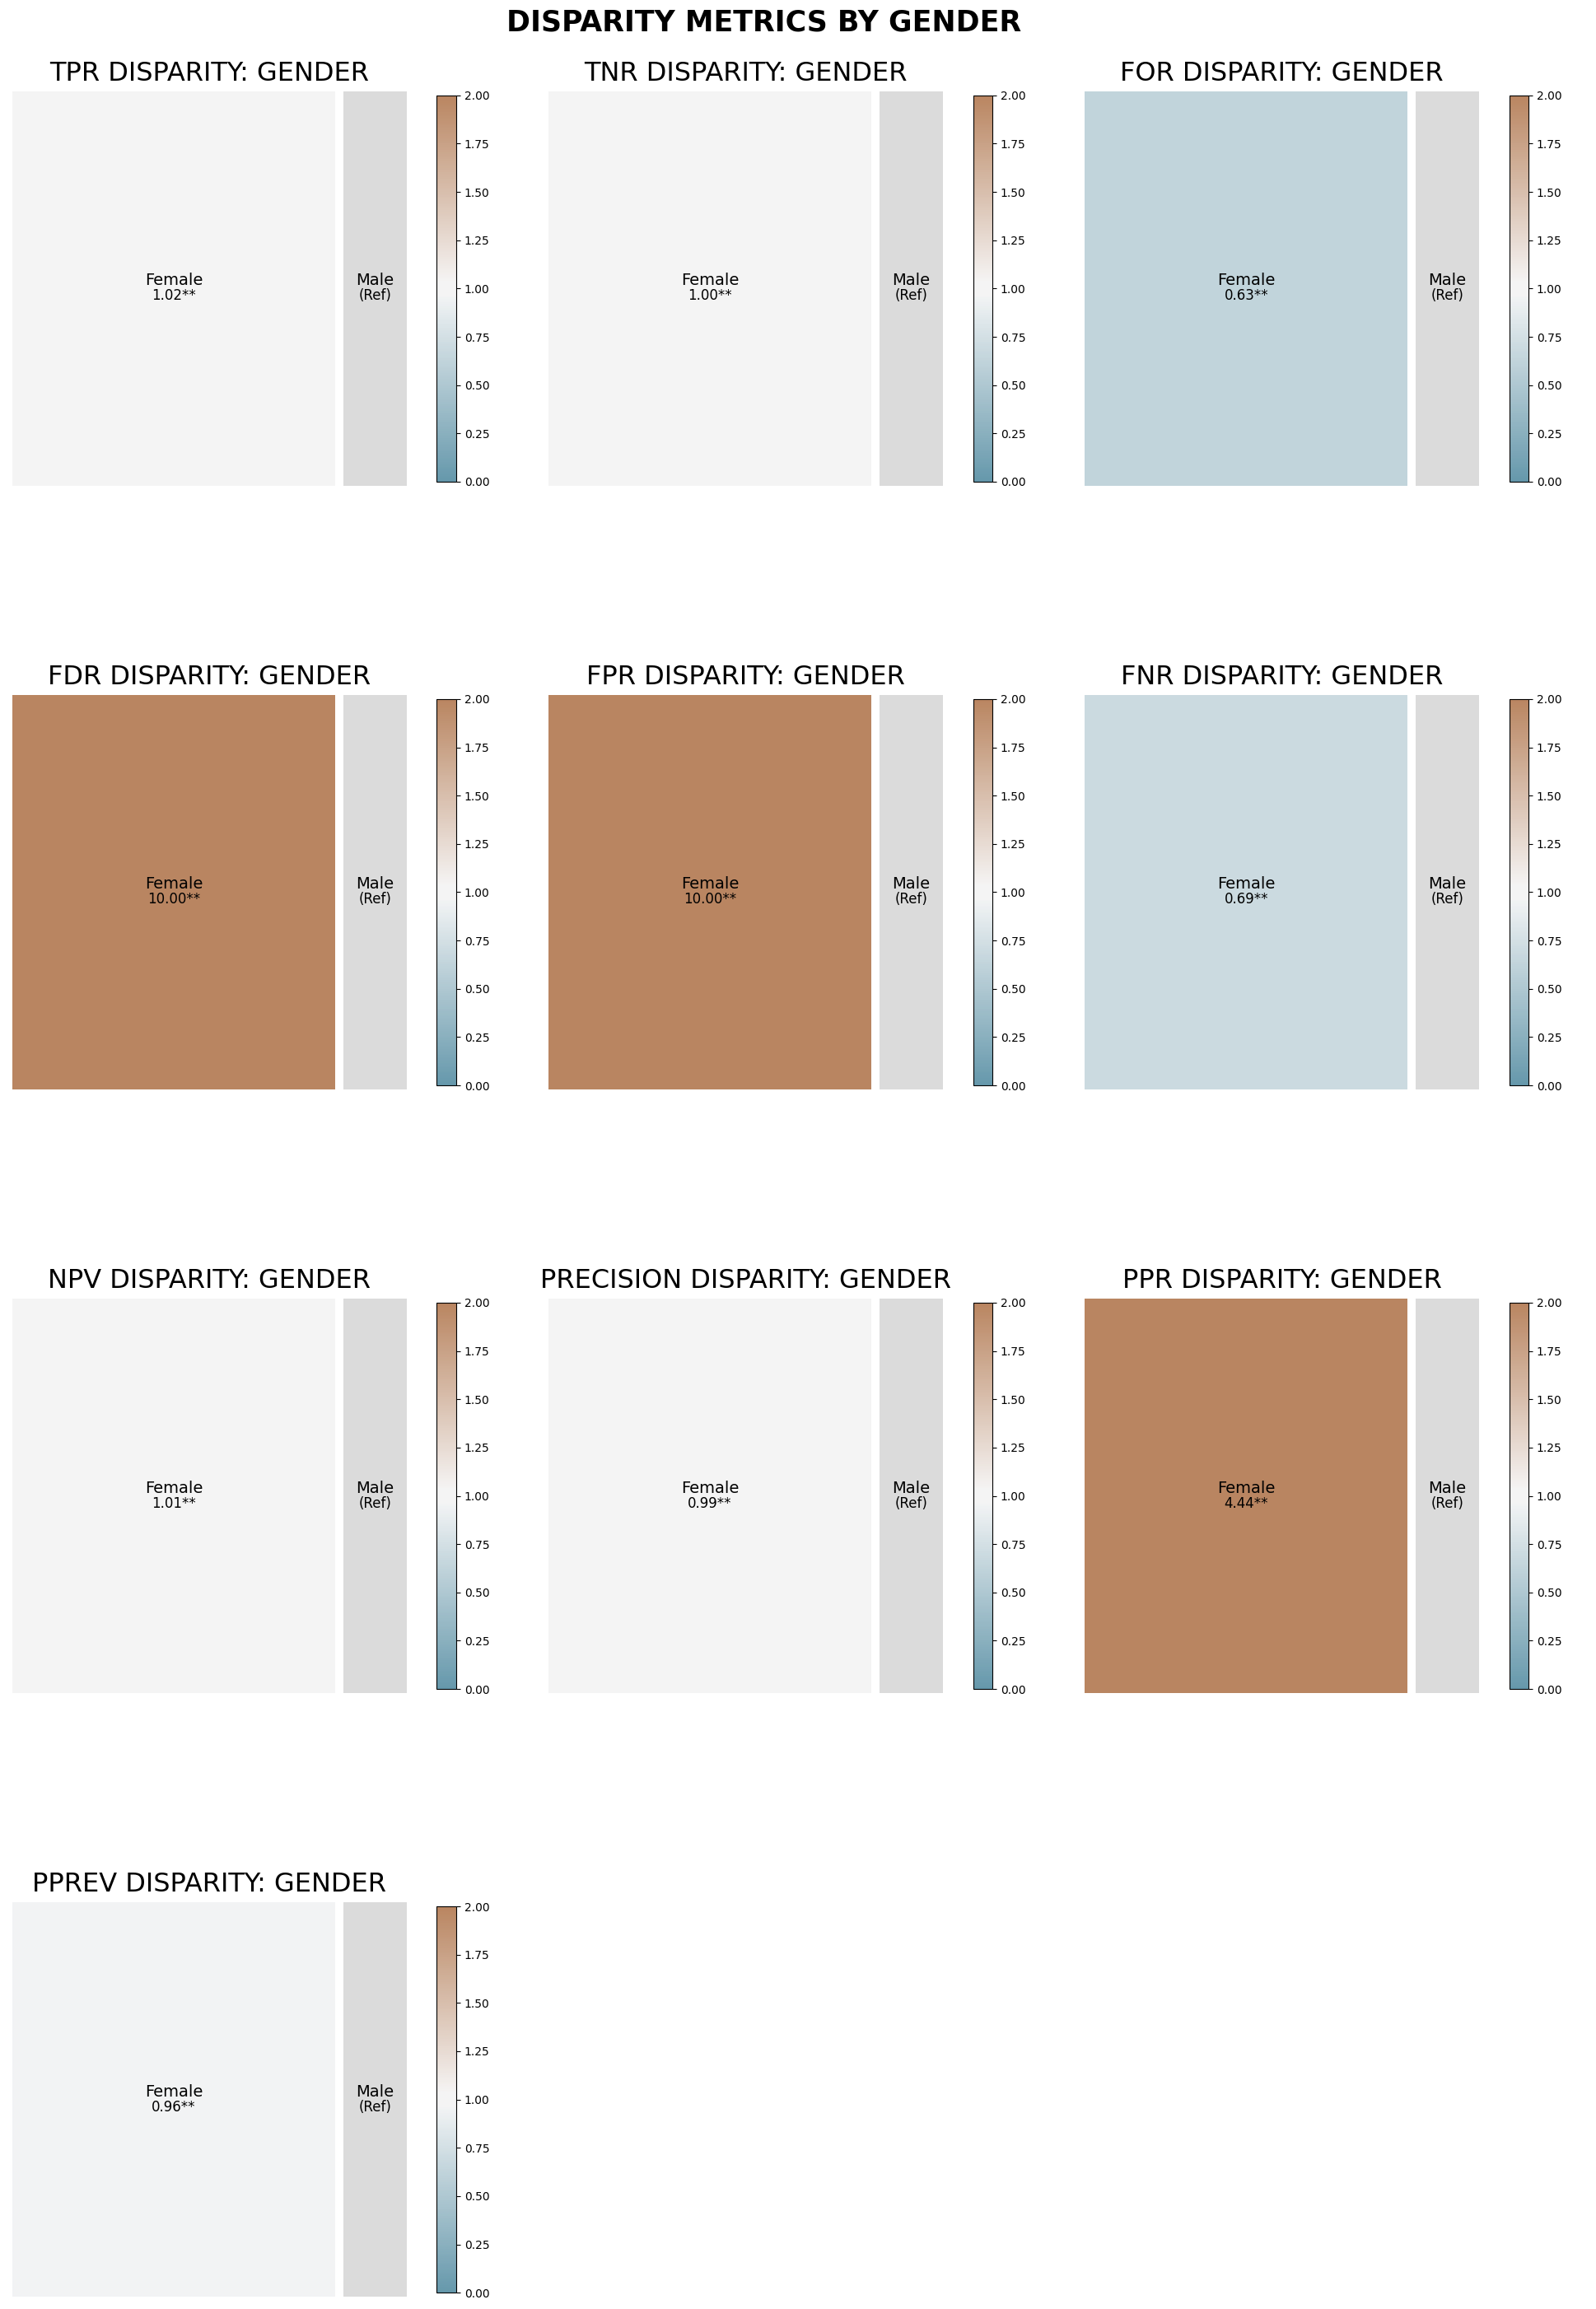

Analyse de biais pour la classe 1:


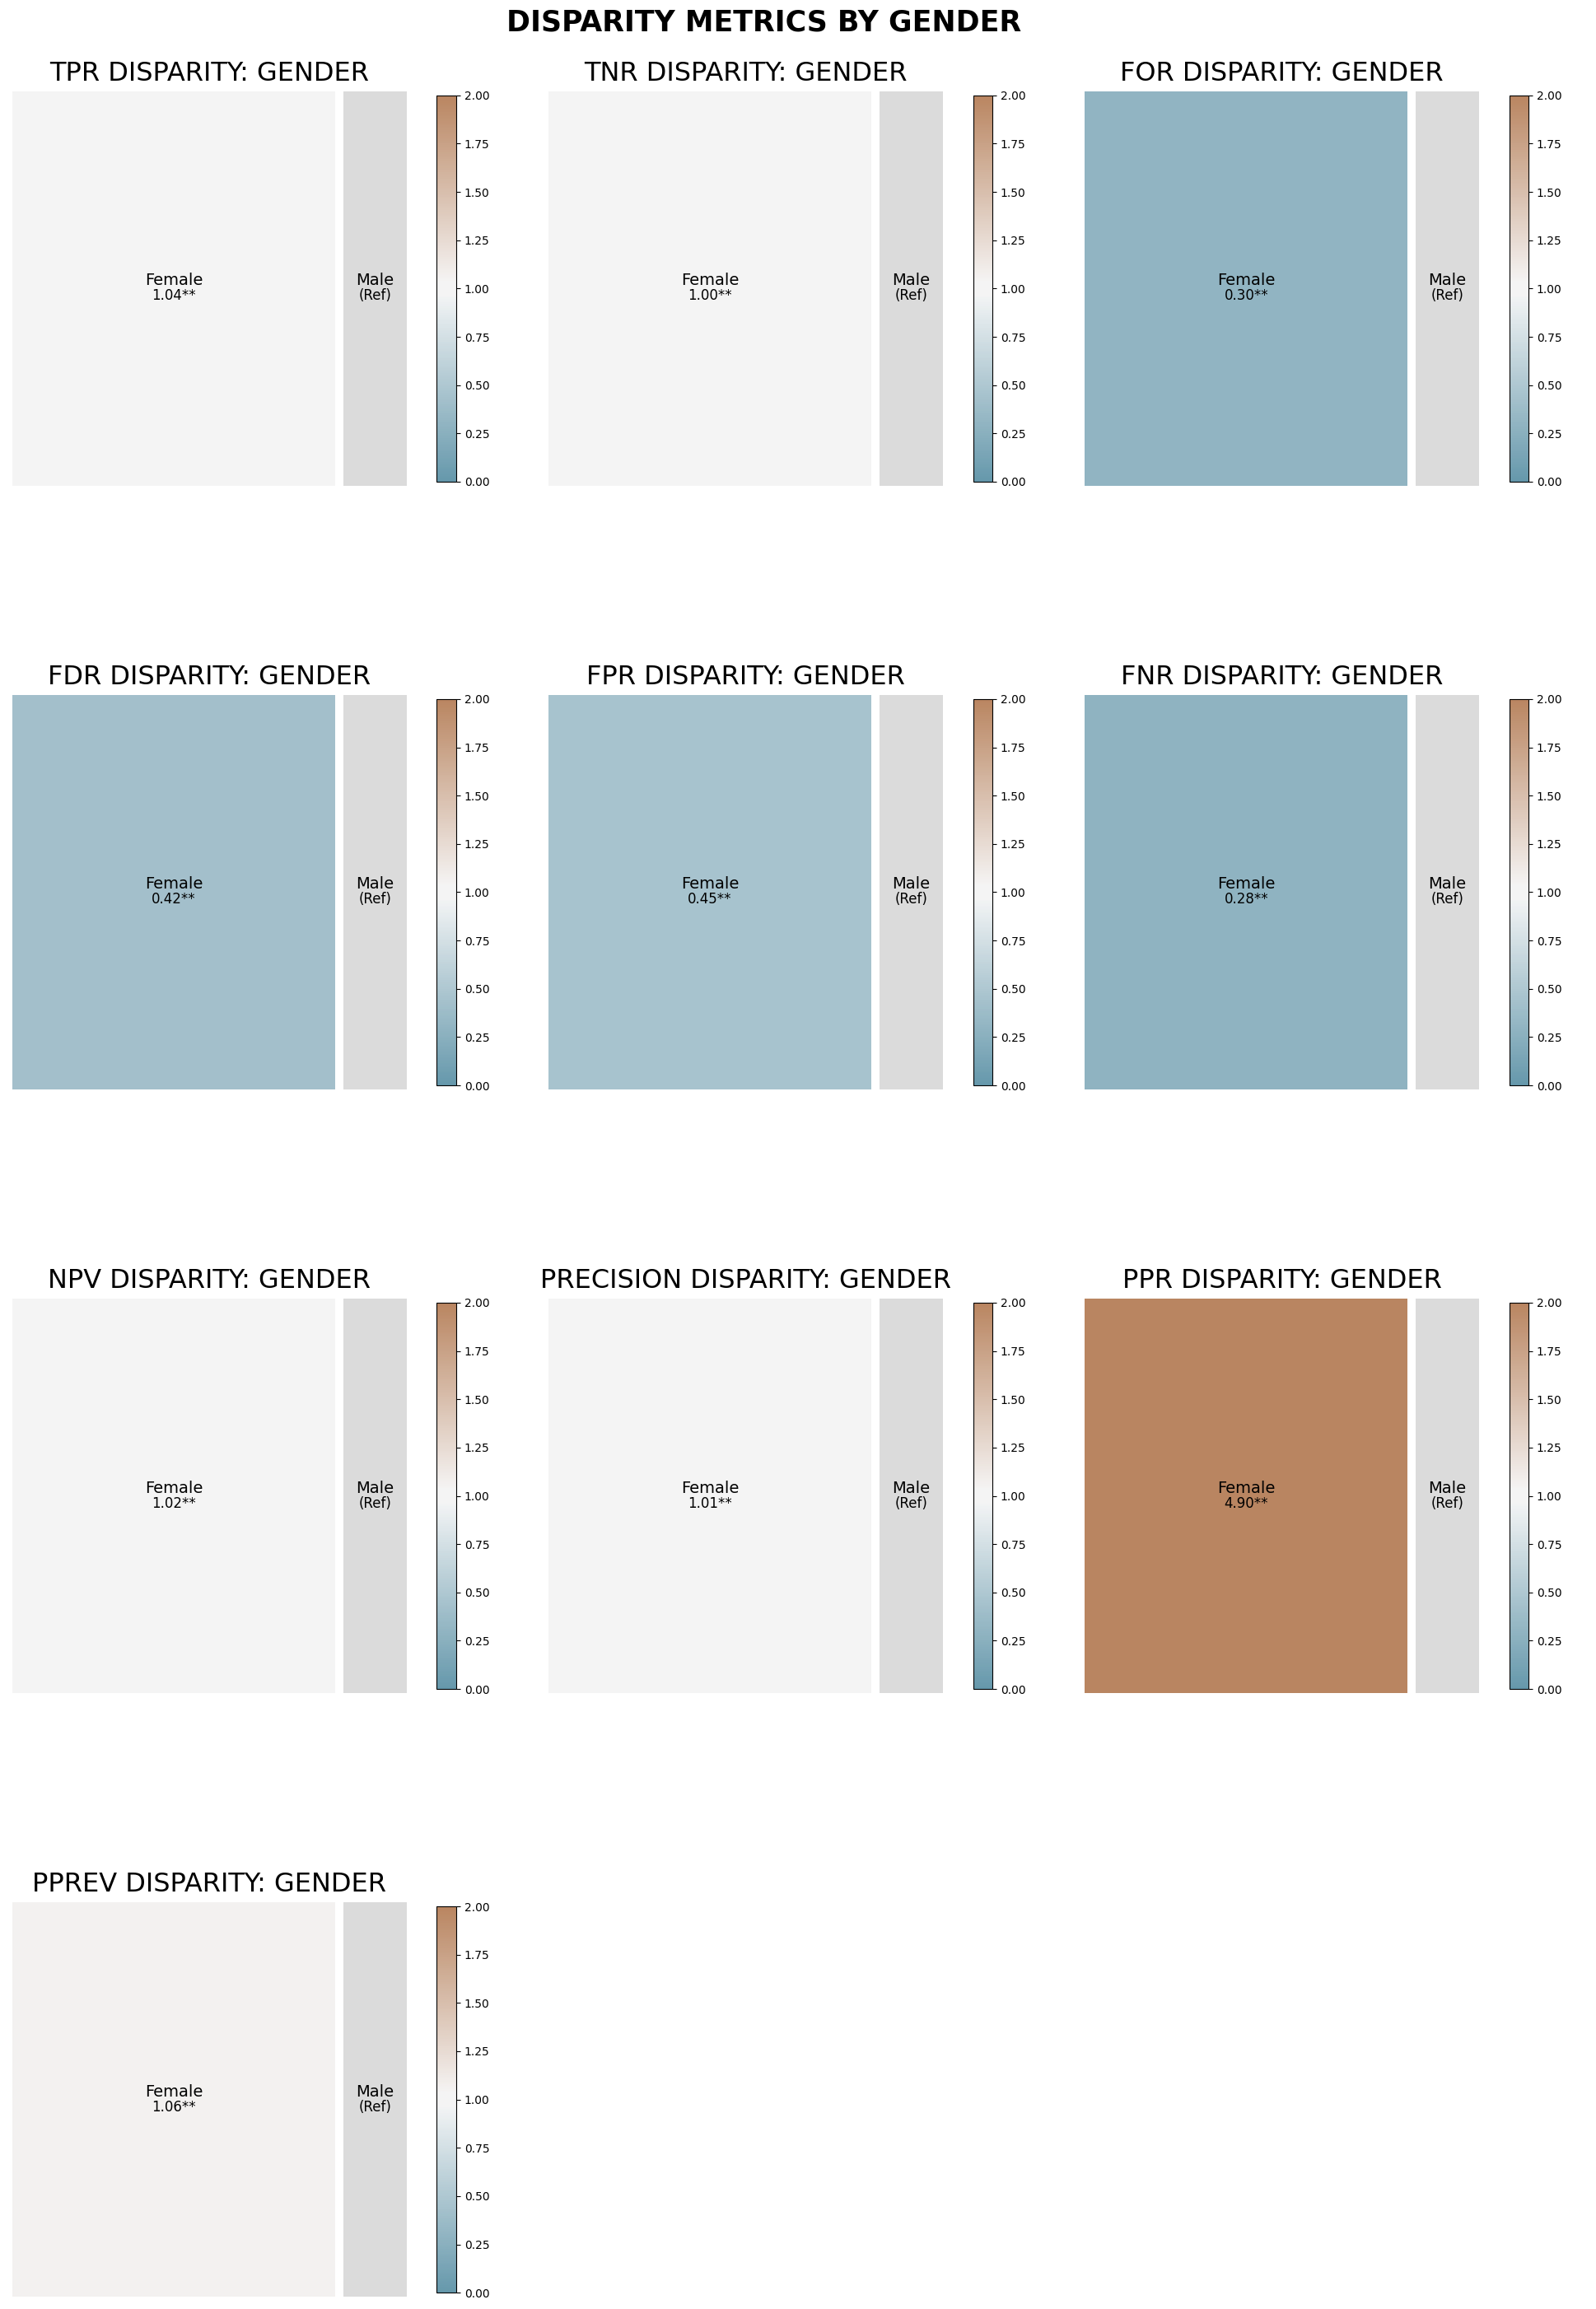

Analyse de biais pour la classe 2:


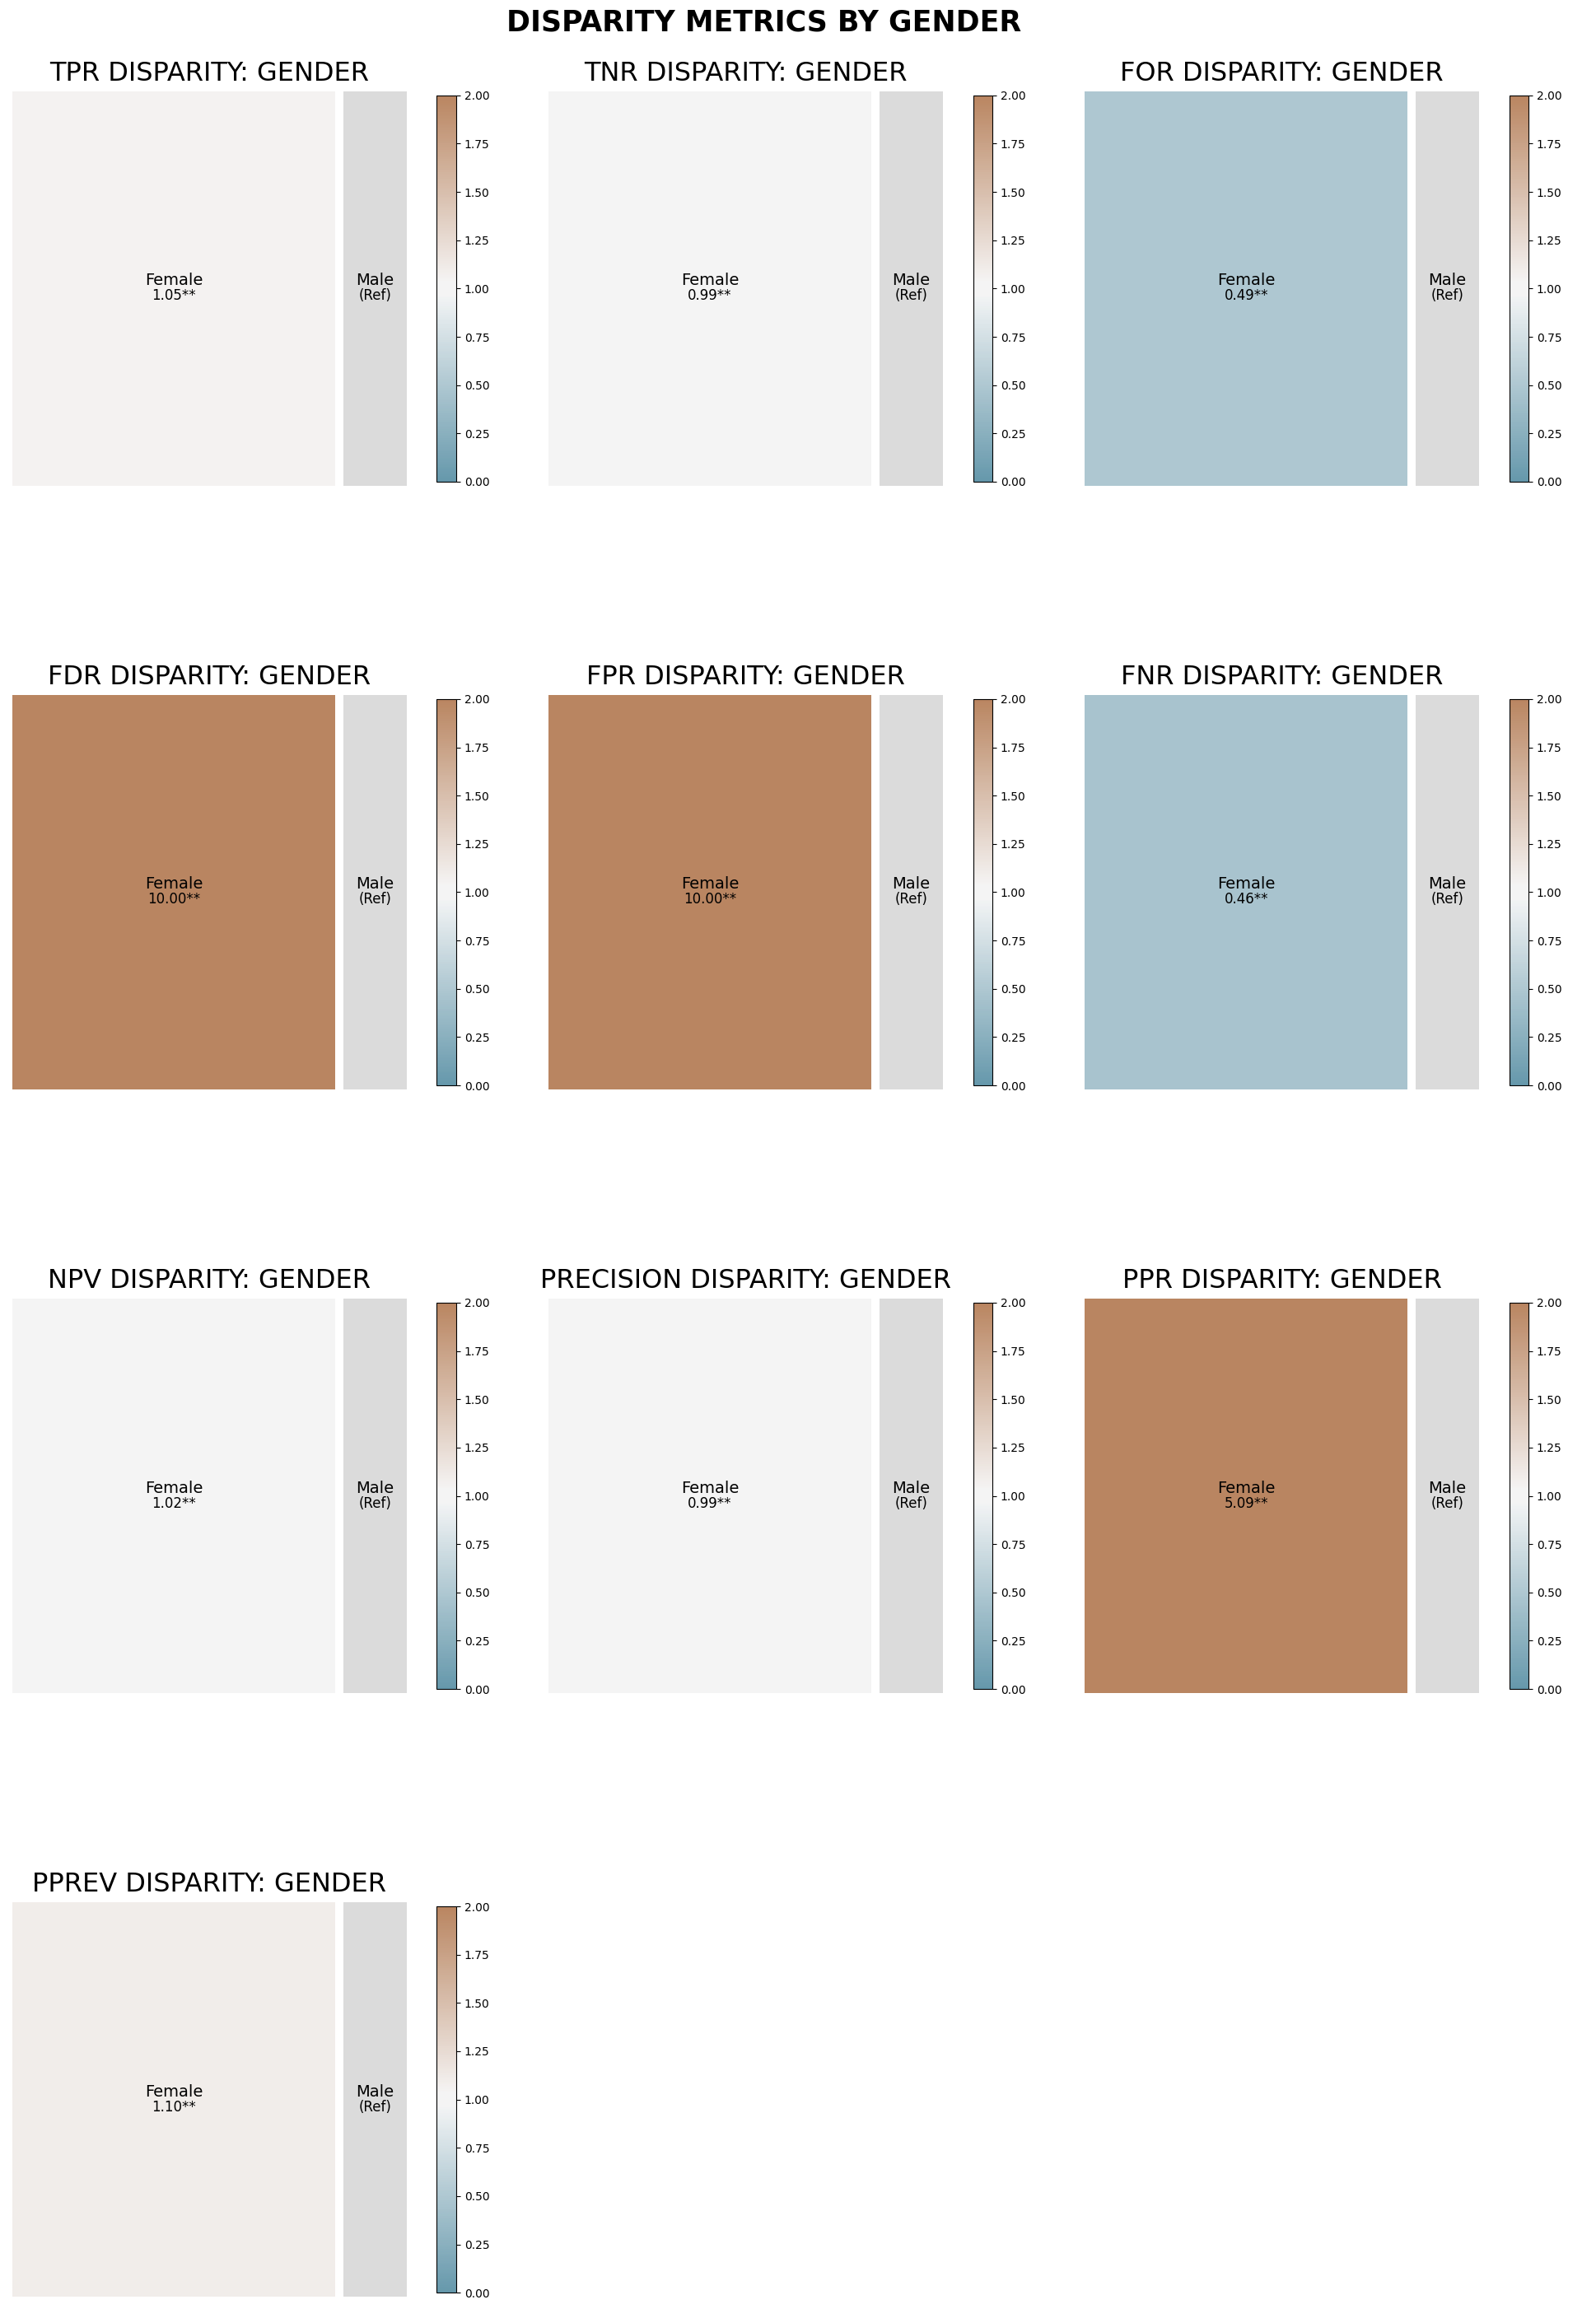

In [38]:
# Aequitas
import numpy as np
import pandas as pd
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.plotting import Plot

gender_map = {0: 'Male', 1: 'Female'}
gender = X_test['Gender'].map(gender_map)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

gender_map = {0: 'Male', 1: 'Female'}
gender = X_test['Gender'].map(gender_map)

def analyze_bias_for_class(class_id):
    scores_class = y_scores[:, class_id]
    label_bin = (y_test == class_id).astype(int)

    ae_subset_df = pd.DataFrame({
        'Gender': gender.astype(str),
        'score': (scores_class >= 0.5).astype(int),
        'label_value': label_bin.astype(int)
    }).dropna(subset=['Gender'])

    ae_df, _ = preprocess_input_df(ae_subset_df)
    ae_df = ae_df[['Gender', 'score', 'label_value']].copy()

    g = Group()
    xtab, _ = g.get_crosstabs(
        ae_df,
        attr_cols=['Gender'],
        score_col='score',
        label_col='label_value'
    )

    b = Bias()
    bdf = b.get_disparity_predefined_groups(
        xtab,
        original_df=ae_subset_df,
        ref_groups_dict={'Gender': 'Male'},
        alpha=0.05,
        check_significance=True
    )

    aqp = Plot()
    print(f"Analyse de biais pour la classe {class_id}:")
    aqp.plot_disparity_all(bdf, attributes=['Gender'], metrics='all')

    return bdf

for class_id in [0, 1, 2]:
    bdf = analyze_bias_for_class(class_id)


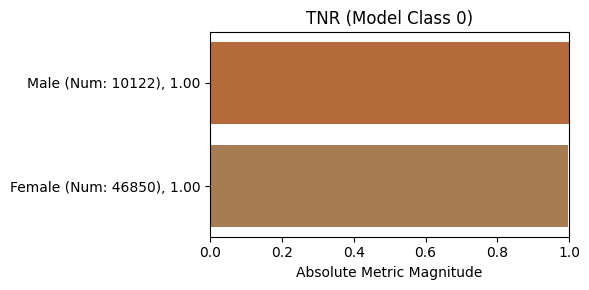

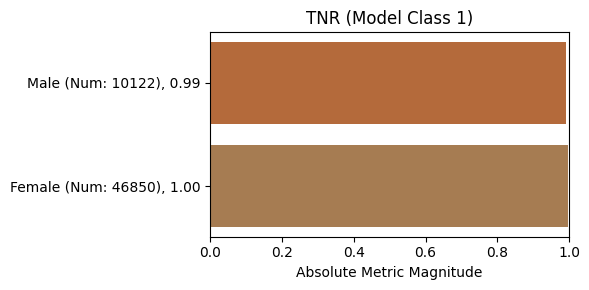

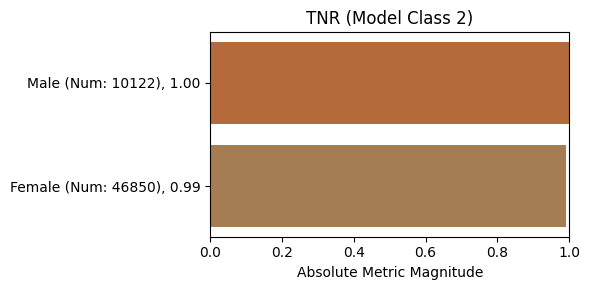

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mapping Gender si besoin (0/1 → Male/Female)
gender_map = {0: 'Male', 1: 'Female'}
if X_test['Gender'].dtype != 'O':
    gender = X_test['Gender'].map(gender_map)
else:
    gender = X_test['Gender']

def plot_tnr_by_gender(class_id, y_scores, y_test, gender):
    # Binarisation label pour la classe d'intérêt
    label_bin = (y_test == class_id).astype(int)
    # Prédiction binaire avec seuil 0.5
    pred_bin = (y_scores[:, class_id] >= 0.5).astype(int)

    df = pd.DataFrame({
        'Gender': gender.values,
        'y_true': label_bin,
        'y_pred': pred_bin
    })

    results = []
    for group in df['Gender'].unique():
        sub = df[df['Gender'] == group]
        tn = np.sum((sub['y_true'] == 0) & (sub['y_pred'] == 0))
        fp = np.sum((sub['y_true'] == 0) & (sub['y_pred'] == 1))
        tnr = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        results.append({
            'group': group,
            'count': len(sub),
            'tnr': tnr
        })

    plot_df = pd.DataFrame(results).sort_values('group')

    fig, ax = plt.subplots(figsize=(6, 3))
    y_labels = [f"{row.group} (Num: {row.count}), {row.tnr:.2f}" for row in plot_df.itertuples()]
    y_pos = range(len(plot_df))
    values = plot_df['tnr'].values
    colors = ['#B46A3B' if g == 'Male' else '#A67C52' for g in plot_df['group']]

    ax.barh(y_pos, values, color=colors)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_labels)
    ax.set_xlim(0, 1)
    ax.set_xlabel("Absolute Metric Magnitude")
    ax.set_title(f"TNR (Model Class {class_id})")
    plt.tight_layout()
    plt.show()

# Boucle sur les classes 0, 1, 2
for class_id in [0, 1, 2]:
    plot_tnr_by_gender(class_id, y_scores, y_test, gender)



Model Fairness Analysis by Gender
1. Disparities in Metrics by Gender (Aequitas)
The first chart shows key fairness metrics computed by Aequitas, comparing model performance between Female and Male, with Male used as the reference group (Male (Ref)).

Each value represents the ratio of the metric for the Female group relative to Male. A value of 1 indicates perfect equality between groups; values above 1 mean the metric is higher for females, and below 1 mean it is lower.

Key takeaways:

For most metrics (TPR, TNR, NPV, Precision), values are very close to 1, indicating overall fairness between genders.

However, significant disparities appear in some metrics:

FPR (False Positive Rate) and FDR (False Discovery Rate): values for Female are 10 times higher than for Male. This means the model produces many more false positives for females.

PPR (Predicted Positive Rate): females receive positive predictions 4.44 times more often than males.

FOR (False Omission Rate) and FNR (False Negative Rate): these rates are lower for females (0.63 and 0.69 respectively), meaning the model misses fewer true positives for females.

The ** symbols indicate statistically significant differences.

Interpretation:

The model tends to predict the positive class much more frequently for females, resulting in substantially higher false positive and positive prediction rates in this group. This may partly be explained by the overrepresentation of females in the data but remains an important fairness concern.

2. Absolute TNR by Gender
The second chart shows the True Negative Rate (TNR) for each gender group in absolute terms.
We observe that TNR is identical and perfect (1.00) for both Male and Female. This means the model makes no errors on negatives regardless of gender.

3. Overall Conclusion
General fairness: The model is fair on most metrics (TPR, TNR, NPV, Precision), with very similar performance across genders.

Detected bias: There is a marked bias favoring females on false positive and predicted positive rates, likely linked to their strong representation in the data, which should be monitored especially if false positives have significant business impact.

Recommendation: Consider strategies to mitigate this bias, such as class balancing, threshold adjustment, or incorporating fairness constraints during model training.

In summary:
The model demonstrates satisfactory fairness on most metrics but generates significantly more false positives for females. While partly related to the initial data distribution, this disparity must be addressed to ensure fair and responsible model use.